# Effect of pass direction on local incidence angle
## Analysis for TDX parameters

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
# Azimuth angles for ascending and descending passes
az_A =349.4 + 90 - 360 
az_D = 192.0 + 90

x = np.linspace(0,360,360) # axis for slope aspect in degrees

In [13]:
def incidence_angle(slope,azimuth,incidence_0): # gets local incidence angle 
    slope = np.deg2rad(slope)
    azimuth = np.deg2rad(azimuth)
    i = np.deg2rad(incidence_0)
    return np.rad2deg( i - slope*np.cos(np.linspace(0,2*np.pi,360) - azimuth) )

In [122]:
def max_angle(slope):   
# calculates largest possible local incidence angle for either ascending or descending
    ascending = incidence_angle(slope,az_A,33)
    descending = incidence_angle(slope,az_D,41)
    minimum = np.minimum(ascending,descending)
    return minimum.max()

def max_aspect(slope):
# finds the aspect angle for which the maximum local incidence angle occurs
    ascending = incidence_angle(slope,az_A,33)
    descending = incidence_angle(slope,az_D,41)
    minimum = np.minimum(ascending,descending)
    position = minimum.argmax()
    return np.linspace(0,360,360)[position]

In [78]:
from matplotlib import rc
plt.rcParams.update({'font.size': 14})

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

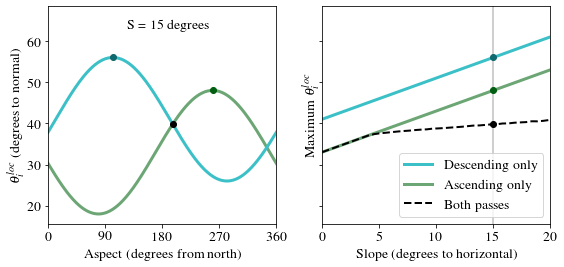

In [132]:
# Plotting

fig,axs = plt.subplots(1,2,figsize=(9,4),sharey=True)
S=15
iA = incidence_angle(S,az_A,33)
iD = incidence_angle(S,az_D,41)
iB = both_angle(S)
iAmax = iA.argmax()
iDmax = iD.argmax()
crossing = max_angle(S)

axs[0].plot(x,iA,color='#6ca675',lw=3)#,label='Ascending')
axs[0].plot(x,iD,color='#3cc0c7',lw=3)#,label='Descending')
#axs[0].plot(x,iB,color='black',lw=2,alpha=0.7,ls='dashed')#,label='Descending')
axs[0].plot(x[iAmax],iA[iAmax],'o',color='#025e10')
axs[0].plot(x[iDmax],iD[iDmax],'o',color='#0f696e')
axs[0].plot(max_aspect(S),crossing,'o',color='black')

axs[0].set_xlabel('Aspect (degrees from north)')
axs[0].set_ylabel('$\\theta_i^{loc}$ (degrees to normal)')
axs[0].annotate('S = 15 degrees',(125,63))
axs[0].set_xlim(0,360)
axs[0].set_xticks([0,90,180,270,360])
#axs[0].legend(loc=(0.13,0.4))

slist = np.linspace(0,25)
bothlist = []

for s in slist:
    bothlist.append(max_angle(s))
    

axs[1].plot(slist,slist+41,label='Descending only',lw=3,color='#3cc0c7')
axs[1].plot(slist,slist+33,label='Ascending only',lw=3,color='#6ca675')
axs[1].plot(slist,bothlist,label='Both passes',color='black',ls='dashed',lw=2)
axs[1].plot(S,iA[iAmax],'o',color='#025e10')
axs[1].plot(S,iD[iDmax],'o',color='#0f696e')
axs[1].plot(S,crossing,'o',color='black')
axs[1].set_xlabel('Slope (degrees to horizontal)')
axs[1].set_ylabel('Maximum $\\theta_i^{loc}$')
axs[1].axvline(x=S,zorder=1,alpha=0.5,color='grey')
axs[1].set_xlim(0,20)
axs[1].set_xticks([0,5,10,15,20])
# axs[1].yaxis.set_label_position("right")
# axs[1].yaxis.tick_right()
plt.legend(loc='lower right')
plt.savefig('/home/s1332488/chapter1/pass_dir_analysis.png',dpi=300)
